# Machine Learning: Linear Regression

This section is about finding correlations between the features of the reweeted tweets. At first, I looked at each original tweet's features and the number of times that it was retweeted. It turns out that the retweet count (on the tracked topics: Blackfriday and CyberMonday) is not correlated to sender account features such as number of followers and friends, etc. It seems having interesting tweet content is the factor that resulted in a high number of retweets, regardless of the features of the posting account. I think this is the beauty of Twitter that unknown users still can get a lot of attention and recognition for posting interesting content.

Focusing on the twitter accounts, especially those that got more than 100 retweets on one of their tweets, we can detect some correlations between the number of followers and some of the account features. Linear regression has been used to describe these relationships.

Here are the features describing Twitter accounts:

- verified: When true, indicates that the user has a verified account. 
- follower count: The number of followers the account currently has.
- friend count: The number of users this account is following.
- status count: The number of Tweets (including retweets) issued by the user
- favorites count: The number of Tweets this user has liked in the account’s lifetime.
- listed count: The number of public lists that this user is a member of. 
- account created at: Time that the account was created.

Accounts with more followers get more first hand exposure for their posted content. A lot of people may be reluctant to retweet about "Shopping Deals"; however, that does not mean those people were not interested in the deals. Getting more followers is the best way to promote advertising campaigns on Twitter, similar to having a rich mailing list for email advertising campaigns. 

Based on this study the number of followers is positively correlated with having a verified account, number of statuses, number of the public lists that the account is a member of, and the number of favorites. The number of followers is strongly correlated with the number of the public lists that the account is a member of. The correlation between the number of followers and the other three features is much less significant.

The observed correlations in this study are valuable in that they provide insight to improve advertising campaigns. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# columns to import from retweets dataset

cols = ['id', 'verified', 'orig_id', 'orig_user',\
        'orig_user_followers', 'orig_user_friends', 'orig_user_favourites',\
        'orig_user_listed', 'orig_user_statuses', 'orig_user_created_at']

retweets = pd.read_csv('df_retweets.csv', usecols = cols, low_memory=False)

retweets.head()

,id,verified,orig_id,orig_user,orig_user_followers,orig_user_friends,orig_user_favourites,orig_user_listed,orig_user_statuses,orig_user_created_at
0,932568005795614720,False,932527666804256768,Amina_Diallo1,44,444,45,0,170,Mon Aug 15 13:31:28 +0000 2011
1,932568007938887680,True,932540839582162945,policia,3049485,0,25781,7875,22662,Wed Mar 11 17:02:34 +0000 2009
2,932568008790298630,False,932564925699981312,Envie_org,1646,626,421,100,1574,Thu Jul 31 11:07:33 +0000 2014
3,932568013274058752,False,932565511086444544,JaponShop,19033,1932,8722,183,23708,Fri Oct 30 00:14:09 +0000 2009
4,932568013651480577,False,932564465010331648,HGJG_VIP,238,135,12,0,127,Wed Apr 05 08:43:29 +0000 2017


In [3]:
tweets = retweets.groupby('orig_id')['id'].count().sort_values(ascending=False).reset_index()
tweets.rename(columns={'id': 'retweet_count'}, inplace=True)
retweets.drop_duplicates('orig_id', inplace=True)
tweets = tweets.merge(retweets, on='orig_id')

In [4]:
tweets.rename(columns={'orig_user': 'username', 'orig_user_followers': 'follower_count',\
                      'orig_user_friends': 'friend_count', 'orig_user_favourites': 'favorite_count',\
                      'orig_user_listed': 'listed_count', 'orig_user_statuses': 'status_count',\
                      'orig_user_created_at':'creation_year'}, inplace=True)
tweets.drop(['orig_id', 'id'], axis=1, inplace=True)

In [5]:
tweets['creation_year'] = pd.to_datetime(tweets['creation_year'])
tweets['creation_year'] = tweets['creation_year'].dt.year

In [6]:
tweets.head()

,retweet_count,verified,username,follower_count,friend_count,favorite_count,listed_count,status_count,creation_year
0,24700,False,AMIClubwear,718722,24,1226,185,8832,2009
1,21456,True,Cdiscount,257826,3387,2264,625,72758,2009
2,17713,True,Cdiscount,257015,3373,2249,647,72671,2009
3,14909,True,Cdiscount,255787,3362,2236,650,72618,2009
4,14765,True,Cdiscount,254640,3330,2225,592,72569,2009


In [7]:
# Only 25% of the data were retweeted more than 3 times. All the variable ranges are very large.
tweets.describe()

,retweet_count,follower_count,friend_count,favorite_count,listed_count,status_count,creation_year
count,313783.000000,3.137830e+05,3.137830e+05,3.137830e+05,313783.000000,3.137830e+05,313783.000000
mean,9.289965,5.458594e+04,4.577428e+03,7.183067e+03,352.998671,2.830885e+04,2012.512701
std,148.399227,6.613463e+05,2.906010e+04,2.143536e+04,2316.882020,8.380770e+04,2.908425
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2006.000000
25%,1.000000,4.750000e+02,2.570000e+02,2.510000e+02,7.000000,1.291000e+03,2010.000000
50%,1.000000,1.977000e+03,7.620000e+02,1.298000e+03,43.000000,5.848000e+03,2012.000000
75%,3.000000,9.124500e+03,2.244500e+03,5.217000e+03,178.000000,2.179600e+04,2015.000000
max,24700.000000,1.037415e+08,1.694316e+06,1.263169e+06,615498.000000,7.852671e+06,2017.000000


## Correlations

In [8]:
# There are a couple of strong correlations
tweets.corr()

,retweet_count,verified,follower_count,friend_count,favorite_count,listed_count,status_count,creation_year
retweet_count,1.000000,0.042021,0.048269,0.002378,0.007665,0.034694,0.005104,-0.015197
verified,0.042021,1.000000,0.176150,0.021705,0.014616,0.241728,0.081576,-0.320731
follower_count,0.048269,0.176150,1.000000,0.082556,0.001280,0.760949,0.103856,-0.094943
friend_count,0.002378,0.021705,0.082556,1.000000,0.056426,0.089967,0.101307,-0.078793
favorite_count,0.007665,0.014616,0.001280,0.056426,1.000000,0.024307,0.242710,-0.063089
listed_count,0.034694,0.241728,0.760949,0.089967,0.024307,1.000000,0.164154,-0.153325
status_count,0.005104,0.081576,0.103856,0.101307,0.242710,0.164154,1.000000,-0.180196
creation_year,-0.015197,-0.320731,-0.094943,-0.078793,-0.063089,-0.153325,-0.180196,1.000000


In [11]:
# Focusing on successful tweets with more than 100 retweets and their accounts
successful_accounts = tweets[tweets['retweet_count']>=100].groupby('username').mean()
print('size of the dataframe:', len(successful_accounts))
successful_accounts.corr()

size of the dataframe: 1737


,retweet_count,verified,follower_count,friend_count,favorite_count,listed_count,status_count,creation_year
retweet_count,1.000000,0.084923,0.031884,-0.029169,-0.041683,0.035217,-0.025626,-0.053124
verified,0.084923,1.000000,0.217450,0.005065,-0.003136,0.297890,0.081378,-0.411404
follower_count,0.031884,0.217450,1.000000,0.007868,-0.033096,0.883680,0.052406,-0.161448
friend_count,-0.029169,0.005065,0.007868,1.000000,0.106123,0.027139,0.055887,-0.075379
favorite_count,-0.041683,-0.003136,-0.033096,0.106123,1.000000,-0.017061,0.407713,-0.024033
listed_count,0.035217,0.297890,0.883680,0.027139,-0.017061,1.000000,0.153843,-0.246043
status_count,-0.025626,0.081378,0.052406,0.055887,0.407713,0.153843,1.000000,-0.229657
creation_year,-0.053124,-0.411404,-0.161448,-0.075379,-0.024033,-0.246043,-0.229657,1.000000


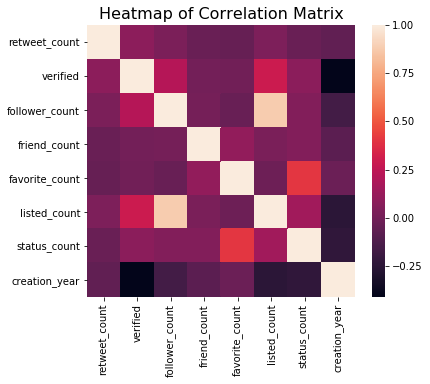

In [12]:
# Focusing on accounts with more than 100 retweets made the correlations stronger  
corr = successful_accounts.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr,
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix', fontsize= 16)

plt.show()

In [13]:
# Even with focusing on successful accounts the variable ranges are very big
successful_accounts.describe()

,retweet_count,follower_count,friend_count,favorite_count,listed_count,status_count,creation_year
count,1737.000000,1.737000e+03,1.737000e+03,1737.000000,1737.000000,1737.000000,1737.000000
mean,425.705317,5.743192e+05,7.922290e+03,13892.560961,1486.861565,29781.060699,2012.356937
std,898.160633,3.800623e+06,4.051826e+04,35191.889350,6460.453295,64558.944003,3.010992
min,100.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2007.000000
25%,132.000000,4.087000e+03,2.320000e+02,410.000000,21.000000,1687.000000,2009.000000
50%,192.000000,1.781900e+04,8.600000e+02,2521.000000,118.000000,8804.000000,2012.000000
75%,368.000000,1.040370e+05,3.453000e+03,11202.000000,601.000000,29296.000000,2015.000000
max,13340.000000,7.582838e+07,1.006557e+06,480872.000000,107386.000000,989206.000000,2017.000000


## Removing Outliers & Feature Scaling

- **The variable ranges are still very large and outliers do exist on the upper end of the spectrum. The outliers should be removed for linear regression.**

In [16]:
def find_outlier (col):
    Interquartile = np.percentile(col, 75)-np.percentile(col, 50)
    return (np.percentile(col, 75) + 3 *Interquartile)

outliers = []
cols = ['retweet_count', 'follower_count', 'friend_count', \
        'favorite_count', 'listed_count', 'status_count', 'creation_year']

for col in cols:
    outliers.append(find_outlier(successful_accounts[col]))

outlier_limits ={}  
outlier_limits = dict(zip(cols, outliers))
print(outlier_limits)

{'retweet_count': 896.0, 'follower_count': 362691.0, 'friend_count': 11232.0, 'favorite_count': 37245.0, 'listed_count': 2050.0, 'status_count': 90772.0, 'creation_year': 2024.0}


In [17]:
ml_accounts = successful_accounts

for col in cols:
    ml_accounts = ml_accounts[ml_accounts[col] <= outlier_limits [col]]

ml_accounts.describe()

,retweet_count,follower_count,friend_count,favorite_count,listed_count,status_count,creation_year
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,245.412747,27198.339234,1550.174399,4607.869179,181.645554,10501.161031,2013.082061
std,168.399397,52152.978242,2134.733823,6895.112511,324.600866,16007.015178,2.998399
min,100.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2007.000000
25%,127.750000,2006.000000,159.500000,261.750000,8.000000,741.250000,2010.000000
50%,175.166667,6749.500000,638.750000,1604.500000,45.000000,3793.500000,2013.000000
75%,298.000000,25697.250000,2052.000000,5907.250000,182.500000,13033.750000,2016.000000
max,888.000000,361148.000000,11092.000000,36096.000000,2041.000000,89924.000000,2017.000000


In [19]:
ml_accounts.corr()

,retweet_count,verified,follower_count,friend_count,favorite_count,listed_count,status_count,creation_year
retweet_count,1.000000,0.027945,-0.000086,-0.065023,-0.052203,-0.027012,-0.094855,0.045292
verified,0.027945,1.000000,0.462858,0.032957,0.131164,0.452123,0.145383,-0.273054
follower_count,-0.000086,0.462858,1.000000,0.017898,0.202633,0.665079,0.216637,-0.238798
friend_count,-0.065023,0.032957,0.017898,1.000000,0.285400,0.084312,0.274737,-0.135810
favorite_count,-0.052203,0.131164,0.202633,0.285400,1.000000,0.243316,0.398483,-0.147475
listed_count,-0.027012,0.452123,0.665079,0.084312,0.243316,1.000000,0.408433,-0.369771
status_count,-0.094855,0.145383,0.216637,0.274737,0.398483,0.408433,1.000000,-0.369816
creation_year,0.045292,-0.273054,-0.238798,-0.135810,-0.147475,-0.369771,-0.369816,1.000000


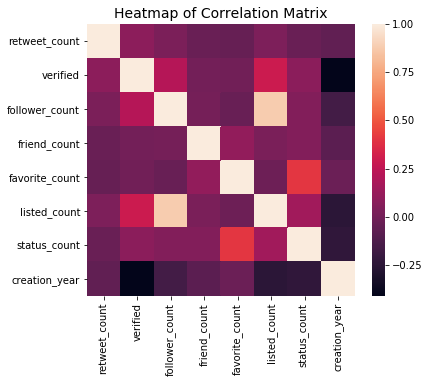

In [20]:
# Heatmap
ml_corr = ml_accounts.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr,
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix', fontsize= 14)
plt.show()

In [21]:
# Normalization: min-max and z-score
# Both methods were tested and resulted in the same p-values, I will present the results of min-max

# Min-Max Scaling 
def scale(x, column):
        return (x-column.min())/(column.max()-column.min())

ml_accounts_scaled = pd.DataFrame()
ml_accounts_scaled ['verified'] = ml_accounts['verified']

for col in cols:
    ml_accounts_scaled [col] =  ml_accounts[col].apply(lambda x: scale(x, ml_accounts[col]))

# Standardization (or Z-score normalization)
def zscore(x, column):
        return (x-column.mean())/(column.std())

ml_accounts_norm = pd.DataFrame()
ml_accounts_norm ['verified'] = ml_accounts['verified']

for col in cols:
    ml_accounts_norm [col] =  ml_accounts[col].apply(lambda x: zscore(x, ml_accounts[col]))

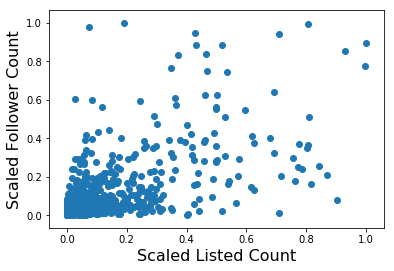

In [23]:
# Scatter plots
_ = plt.scatter(ml_accounts_scaled.listed_count, ml_accounts_scaled.follower_count)
_ = plt.xlabel('Scaled Listed Count', fontsize=16)
_ = plt.ylabel('Scaled Follower Count', fontsize=16)

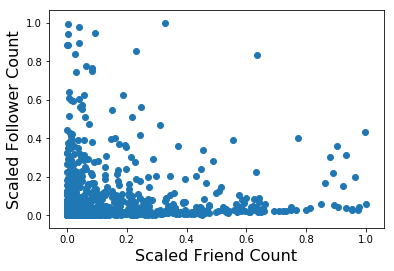

In [24]:
_ = plt.scatter(ml_accounts_scaled.friend_count, ml_accounts_scaled.follower_count)
_ = plt.xlabel('Scaled Friend Count', fontsize=16)
_ = plt.ylabel('Scaled Follower Count', fontsize=16)

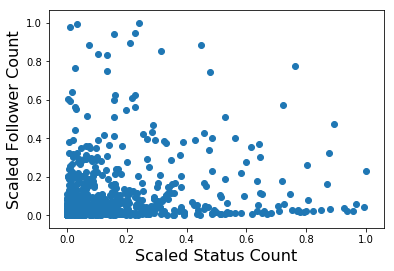

In [25]:
_ = plt.scatter(ml_accounts_scaled.status_count, ml_accounts_scaled.follower_count)
_ = plt.xlabel('Scaled Status Count', fontsize=16)
_ = plt.ylabel('Scaled Follower Count', fontsize=16)

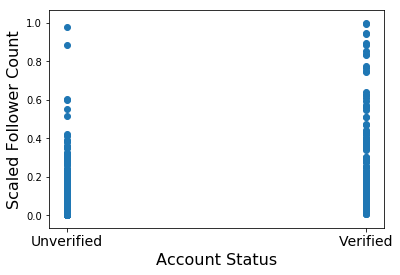

In [26]:
_ = plt.scatter(ml_accounts_scaled.verified, ml_accounts_scaled.follower_count)
_ = plt.xticks([0, 1], ['Unverified', 'Verified'], fontsize=14)
_ = plt.ylabel('Scaled Follower Count', fontsize=16)
_ = plt.xlabel('Account Status', fontsize=16)

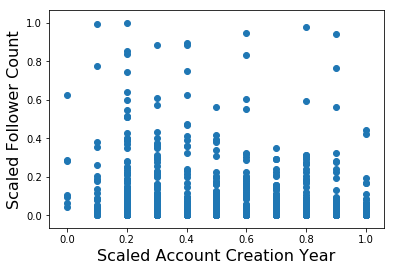

In [27]:
_ = plt.scatter(ml_accounts_scaled.creation_year, ml_accounts_scaled.follower_count)
_ = plt.xlabel('Scaled Account Creation Year', fontsize=16)
_ = plt.ylabel('Scaled Follower Count', fontsize=16)

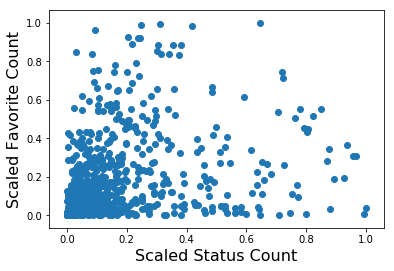

In [28]:
_ = plt.scatter(ml_accounts_scaled.status_count, ml_accounts_scaled.favorite_count)
_ = plt.xlabel('Scaled Status Count', fontsize=16)
_ = plt.ylabel('Scaled Favorite Count', fontsize=16)

## Linear Regression

- First, we look at the linear relationship between the number of followers and individual features.
- We do a linear regression considering all features and pick the significant ones.

In [29]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols # ordinary least squares 

c:\users\mahshid\appdata\local\programs\python\python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
m = ols('follower_count ~ status_count',ml_accounts_scaled).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         follower_count   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     51.51
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           1.35e-12
Time:                        01:17:42   Log-Likelihood:                 566.63
No. Observations:                1048   AIC:                            -1129.
Df Residuals:                    1046   BIC:                            -1119.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0548      0.005     10.513   

In [31]:
m = ols('follower_count ~ creation_year',ml_accounts_norm).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         follower_count   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     63.25
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           4.69e-15
Time:                        01:17:45   Log-Likelihood:                -1455.8
No. Observations:                1048   AIC:                             2916.
Df Residuals:                    1046   BIC:                             2925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.742e-15      0.030  -2.58e-13

In [32]:
m = ols('follower_count ~ creation_year',ml_accounts_norm).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         follower_count   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     63.25
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           4.69e-15
Time:                        01:17:46   Log-Likelihood:                -1455.8
No. Observations:                1048   AIC:                             2916.
Df Residuals:                    1046   BIC:                             2925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.742e-15      0.030  -2.58e-13

In [33]:
m = ols('follower_count ~ favorite_count',ml_accounts_norm).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         follower_count   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     44.79
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           3.57e-11
Time:                        01:17:46   Log-Likelihood:                -1464.6
No. Observations:                1048   AIC:                             2933.
Df Residuals:                    1046   BIC:                             2943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.939e-18      0.030   2.29e

In [34]:
m = ols('follower_count ~ listed_count',ml_accounts_scaled).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         follower_count   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     829.7
Date:                Fri, 16 Feb 2018   Prob (F-statistic):          8.40e-135
Time:                        01:17:47   Log-Likelihood:                 847.45
No. Observations:                1048   AIC:                            -1691.
Df Residuals:                    1046   BIC:                            -1681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0216      0.004      5.646   

In [35]:
m = ols('follower_count ~ friend_count',ml_accounts_norm).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         follower_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3352
Date:                Fri, 16 Feb 2018   Prob (F-statistic):              0.563
Time:                        01:17:47   Log-Likelihood:                -1486.4
No. Observations:                1048   AIC:                             2977.
Df Residuals:                    1046   BIC:                             2987.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.939e-18      0.031   2.25e-16   

In [36]:
m = ols('follower_count ~ verified + listed_count + status_count + friend_count + favorite_count + creation_year',ml_accounts_scaled).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         follower_count   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     162.1
Date:                Fri, 16 Feb 2018   Prob (F-statistic):          2.24e-145
Time:                        01:17:48   Log-Likelihood:                 887.19
No. Observations:                1048   AIC:                            -1760.
Df Residuals:                    1041   BIC:                            -1726.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0124      0.010  

In [48]:
# Selecting the features with feature which had p-values < 0.05
model = ols('follower_count ~ verified + listed_count + status_count + favorite_count',ml_accounts_scaled).fit()
# predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         follower_count   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     242.1
Date:                Fri, 16 Feb 2018   Prob (F-statistic):          4.50e-147
Time:                        01:30:07   Log-Likelihood:                 885.59
No. Observations:                1048   AIC:                            -1761.
Df Residuals:                    1043   BIC:                            -1736.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0152      0.004  

Text(0.5,1,'Linear Regression')

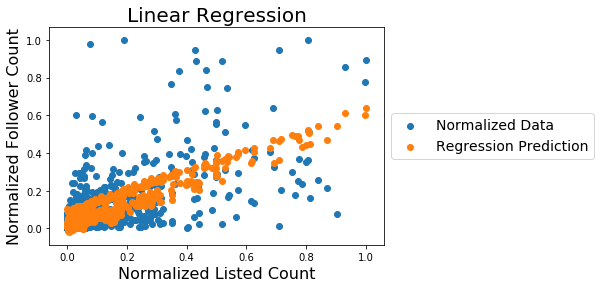

In [49]:
# Linear model prediction
plt.scatter(ml_accounts_scaled.listed_count, ml_accounts_scaled.follower_count, label='Normalized Data')
plt.scatter(ml_accounts_scaled.listed_count, model.fittedvalues, label='Regression Prediction')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.xlabel('Normalized Listed Count', fontsize=16)
plt.ylabel('Normalized Follower Count', fontsize=16)
plt.title('Linear Regression', fontsize=20)

Text(0.5,1,'Linear Regression')

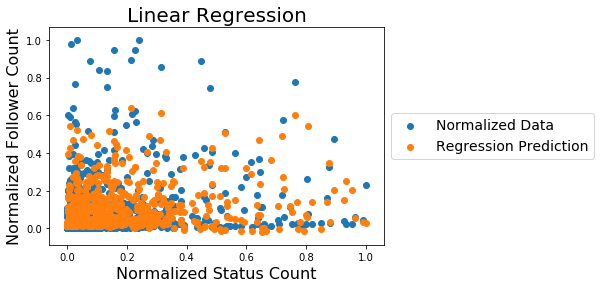

In [50]:
# Linear model prediction
plt.scatter(ml_accounts_scaled.status_count, ml_accounts_scaled.follower_count, label='Normalized Data')
plt.scatter(ml_accounts_scaled.status_count, model.fittedvalues, label='Regression Prediction')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.xlabel('Normalized Status Count', fontsize=16)
plt.ylabel('Normalized Follower Count', fontsize=16)
plt.title('Linear Regression', fontsize=20)